# Merge, Clean, Check, and Model Fine Images (new Aquasat) used for Prediction 2000-2022

In [1]:
#module imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob

os.chdir('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/')

In [2]:
# Column formatting
df['date'] = df['date'].str.slice(2, 12)
df['date'] = df['date'].str.replace('_','-')
df.date

NameError: name 'df' is not defined

In [ ]:
filterDate = df
filterDate['date'] = pd.to_datetime(df.date, format = '%Y-%m-%d')
filterDate = filterDate[(filterDate['date'] < '2006-01-01') &(filterDate['date'] > '2004-01-01')]
print(filterDate.SiteID.unique())

sites = ['INSTOR_WQX-2221', 'USGS-03049625', 'USGS-03086000', 'INSTOR_WQX-2253']
filtered = df[df['SiteID'].isin(sites)]

print(filtered.shape[0])

In [3]:
file_list = glob.glob(os.path.join('finePredImages', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True)
print(dataframe.columns.values.tolist())

['SiteID', 'date', 'sceneID', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'qa', 'dswe', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'qa_sd', 'dswe_sd', 'hillshade', 'hillshadow', 'hillshadow_sd', 'azimuth', 'zenith', 'pixelCount', 'elevation']


In [4]:
#Drop na, synch column names if needed, and remove negative band values
df=dataframe.dropna(subset='blue').drop_duplicates()
df = df[(df.red > 0) & (df.nir > 0) & (df.blue > 0) & (df.green > 0) & (df.swir1 > 0) & (df.swir2 > 0) & (df.nir > 0)]
df['date_time'] = df['date']
print(df.shape[0])
print(list(df.SiteID.unique()))

36814
['INSTOR_WQX-2618', 'INSTOR_WQX-2253', '21VASWCB-9-NEW107.51', 'INSTOR_WQX-2327', 'USGS-03216600', 'USGS-03086000', 'INSTOR_WQX-2531', 'INSTOR_WQX-2323', '21VASWCB-9-NEW081.72', 'INSTOR_WQX-14844', '21PA_WQX-WQN0701', 'INSTOR-WWU120-0007', 'INSTOR_WQX-2619', 'INSTOR_WQX-2508', 'INSTOR-WWL100-0001', '31ORWUNT_WQX-OR2603M', 'INSTOR_WQX-2221', 'INSTOR_WQX-2349', 'INSTOR_WQX-4491', 'USACOEND-3BAR20002', 'INSTOR_WQX-2346', 'USACOEND-3COR20002', 'USGS-03321500', 'INSTOR-WLV140-0001', 'INSTOR_WQX-2447', '21VASWCB-9-NEW148.23', '31ORWUNT_WQX-OR204.9M', '31ORWUNT-OR204.9M', '21PA_WQX-WQN0801', 'USGS-03612500', '31ORWUNT_WQX-OR7771M', 'INSTOR_WQX-2282', '21PA_WQX-WQN0902', 'INSTOR_WQX-2514', '21VASWCB-9-NEW127.49', 'INSTOR_WQX-2337', 'USGS-03049625', '31ORWUNT_WQX-OR7018M', 'INSTOR_WQX-2617', '21PA_WQX-WQN0905', 'INSTOR-WUW160-0006', 'USACOEND-3BAR10001', 'INSTOR_WQX-2336', 'INSTOR-WBU100-0001', '31ORWUNT_WQX-OR544.8M', '31ORWUNT-OR544.8M', 'INSTOR_WQX-2321', '31ORWUNT-WA32.5M', 'USGS-4039

In [5]:
sent =  df.sceneID[df.sceneID.str.startswith('L2')].tolist()
len(sent)
sites = ['INSTOR_WQX-2221', 'USGS-03049625', 'USGS-03086000', 'INSTOR_WQX-2253']
filteredFine = df[df['SiteID'].isin(sites)]

print(filteredFine.shape[0])

2666


In [6]:
fusionSites = ['USGS-03049625', 'INSTOR_WQX-2327', '21PA_WQX-WQN0905', 
               'INSTOR_WQX-2323', 'INSTOR_WQX-2321', 'INSTOR_WQX-2336', 
               'INSTOR_WQX-2337', 'INSTOR_WQX-2447', 'INSTOR_WQX-2221', 
               '21PA_WQX-WQN0902', 'INSTOR_WQX-2253', 'INSTOR_WQX-2282', 
               'INSTOR_WQX-4491', '21PA_WQX-WQN0701', '21PA_WQX-WQN0801']
hls_fusionSites = df[df['SiteID'].isin(fusionSites)]
print(hls_fusionSites.shape[0])


10007


In [7]:
#Add band ratios
df = df.assign(NR = df['nir']/df['red'],
                BR = df['blue']/df['red'],
                GR = df['green']/df['red'],
                SR = df['swir1']/df['red'],
                BG = df['blue']/df['green'],
                RG = df['red']/df['green'],
                NG = df['nir']/df['green'],
                SG = df['swir1']/df['green'],
                BN = df['blue']/df['nir'],
                GN = df['green']/df['nir'],
                RN = df['red']/df['nir'],
                SN = df['swir1']/df['nir'],
                BS = df['blue']/df['swir1'],
                GS = df['green']/df['swir1'],
                RS = df['red']/df['swir1'],
                NS = df['nir']/df['swir1'],
                R_GN = df['red']/ (df['green'] + df['nir']),
                R_GB = df['red']/ (df['green'] + df['blue']),
                R_GS = df['red']/ (df['green'] + df['swir1']),
                R_BN = df['red']/ (df['blue'] + df['nir']),
                R_BS = df['red']/ (df['blue'] + df['swir1']),
                R_NS = df['red']/ (df['nir'] + df['swir1']),
                G_BR = df['green']/ (df['blue'] + df['red']),
                G_BN = df['green'] / (df['blue'] + df['nir']),
                G_BS = df['green'] / (df['blue'] + df['swir1']),
                G_RN = df['green'] / (df['red'] + df['nir']),
                G_RB = df['green'] / (df['red'] + df['blue']),
                G_NS = df['green'] / (df['nir'] + df['swir1']),
                B_RG = df['blue'] / (df['red'] + df['green']),
                B_RN = df['blue'] / (df['red'] + df['nir']),
                B_RS = df['blue'] / (df['red'] + df['swir1']),
                B_GN = df['blue'] / (df['green'] + df['nir']),
                B_GS = df['blue'] / (df['green'] + df['swir1']),
                B_NS = df['blue'] / (df['nir'] + df['swir1']),
                N_RG = df['nir'] / (df['red'] + df['green']),
                N_RB = df['nir'] / (df['red'] + df['blue']),
                N_RS = df['nir'] / (df['red'] + df['swir1']),
                N_GB = df['nir'] / (df['green'] + df['blue']),
                N_GS = df['nir'] / (df['green'] + df['swir1']),
                N_BS = df['nir'] / (df['blue']  + df['swir1']),
                
                GR2 = (df['green'] + df['red']) / 2,
                GN2 = (df['green'] + df['nir']) / 2,
                #blooms
                BR_G = (df['blue'] - df['red']) / df['green'],
                NS_NR = (df['nir'] - df['swir1']) / (df['red'] - df['swir1']),
                fai = df['nir'] - (df['red'] + (df['swir1']-df['red'])*((830-660)/(1650-660))),
                # fai = (nir - red) + (red -swir) * (830-660)/(1648-660)
                N_S= df['nir'] - df['swir1'],
                N_R = df['nir']- df['red'],
                #
                ndvi = ((df['nir']-df['red'])/(df['nir']+df['red'])),
                ndwi = ((df['green']- df['swir1'])/(df['green'] + df['swir1'])),
                ndssi = ((df['blue'] - df['nir'])/ (df['blue'] + df['nir'])),
                gn_gn= ((df['green']- df['nir'])/ (df['green'] + df['nir'])),
                Matchup = 'HLS_Cloud')


In [8]:
#Matchups
#bring in WQP cleaned data
huc5 = pd.read_csv(r'notAquasat_huc5_5.csv').dropna(subset='date_time')
huc5['tss'] = huc5['value']
print(huc5.columns.values.tolist())
print(len(list(huc5.SiteID.unique())))
print(len(huc5.index))
print(huc5.date)

site = huc5[huc5['SiteID'] == 'INSTOR_WQX-2221'] #'USGS-03049625']
site = site[site['date'] > '2000-01-01']
#print(site)
#print(huc5.sort_values(by = 'date'))

['Unnamed: 0', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year', 'tss']
2983
103116
0         1991-06-20
1         1998-04-10
2         1997-10-08
3         1999-06-15
4         1998-04-24
             ...    
131517    2012-03-13
131518    2003-04-14
131519    2004-09-08
131520    2001-09-06
131521    2019-10-23
Name: date, Length: 103116, dtype: object


/scratch/ceewater-cpu001/6042722/ipykernel_1088087/120752981.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  huc5 = pd.read_csv(r'notAquasat_huc5_5.csv').dropna(subset='date_time')


In [9]:
#Merge data +/- 1 day
#sort the dataframes
df = df.sort_values(by = 'date_time')
huc5 = huc5[['tss', 'parameter', 'units', 'SiteID', 'datum', 'particle_size', 'time', 'date_time', 'hydroCondition', 'hydroEvent']].sort_values(by = 'date_time')
huc5['date_time'] = pd.to_datetime(huc5['date_time'])
df['date_time'] = pd.to_datetime(df['date_time'])

finePred_tss = pd.merge_asof(huc5, df, on = 'date_time', by ='SiteID',
                                 tolerance=pd.Timedelta(1, "d"),
                                 allow_exact_matches=True).dropna(subset = 'blue')

finePred_tss['tss_log'] = np.log(finePred_tss['tss'])
finePred_tss['R_GB_log'] = np.log(finePred_tss['R_GB'])
# print the variable
#print(finePred_tss.head())

#get siteID's
finePredSites = list(finePred_tss.SiteID.unique())

print(len(finePred_tss.index))
print(finePred_tss.columns.values.tolist())

120
['tss', 'parameter', 'units', 'SiteID', 'datum', 'particle_size', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'date', 'sceneID', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'qa', 'dswe', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'qa_sd', 'dswe_sd', 'hillshade', 'hillshadow', 'hillshadow_sd', 'azimuth', 'zenith', 'pixelCount', 'elevation', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'tss_log', 'R_GB_log']


In [10]:
#Further munging and adding useful columns for visualization
finePred_tss = finePred_tss.drop_duplicates(subset=['SiteID', 'date', 'tss'])
finePred_tss['year'] = pd.to_datetime(finePred_tss['date']).dt.year
finePred_tss['month'] = pd.to_datetime(finePred_tss['date']).dt.month
finePred_tss['date'] = pd.to_datetime(finePred_tss['date'], format = '%Y-%m-%d')
#finePred_tss = finePred_tss[finePred_tss['date_time'] > '2000-01-01 00:00:00']
print(finePred_tss.columns.values.tolist())
print(finePred_tss.date)

['tss', 'parameter', 'units', 'SiteID', 'datum', 'particle_size', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'date', 'sceneID', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'qa', 'dswe', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'qa_sd', 'dswe_sd', 'hillshade', 'hillshadow', 'hillshadow_sd', 'azimuth', 'zenith', 'pixelCount', 'elevation', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'tss_log', 'R_GB_log', 'year', 'month']
10923    1992-05-07
10924    1992-05-07
11182    1992-07-01
11183    1992-07-01
11556    1992-10-14
            ...    
102722   2021-02-24
102723   2021-02-24
102754   2021-03-03
102755   2021-0

[Text(0.5, 1.0, 'Additional Huc5Fine Image TSS vs Red Reflectance')]

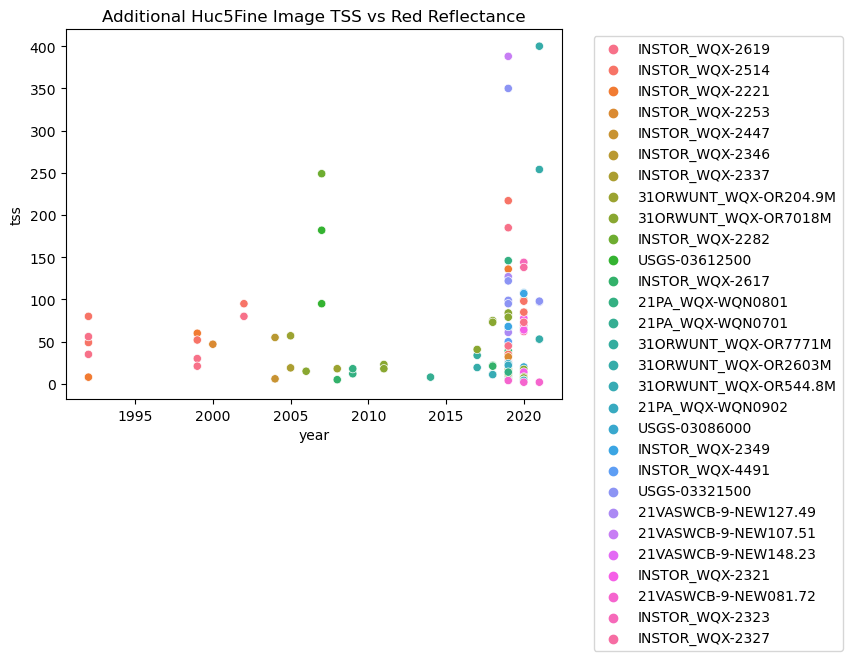

In [11]:
#finePred_tss = finePred_tss.groupby("SiteID").filter(lambda x: len(x) > 10)

plot = sns.scatterplot(data=finePred_tss, x="year", y="tss", 
                       legend = 'brief', hue="SiteID")
plt.legend(fontsize='6')

sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
plot.set(title='Additional Huc5Fine Image TSS vs Red Reflectance')

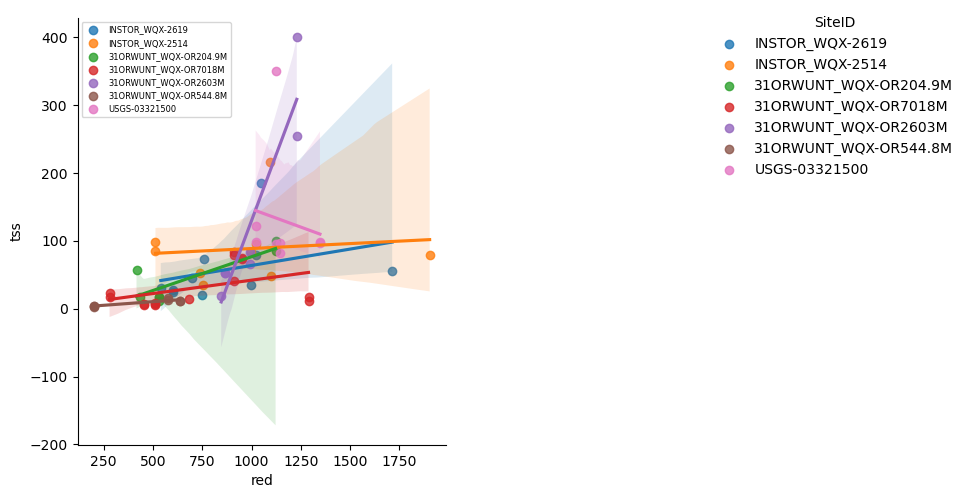

In [12]:
finePred_tss_5 = finePred_tss.groupby("SiteID").filter(lambda x: len(x) > 5)

plot = sns.lmplot(data=finePred_tss_5, x="red", y="tss", 
                       legend = 'brief', hue="SiteID")
plt.legend(fontsize='6')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

# Combine with Aquasat

In [13]:
#bring in Aquasat

aquaHuc5 = pd.read_csv(r'aquasat_huc5_ratio.csv')
print(aquaHuc5[aquaHuc5['SiteID'] == 'INSTOR_WQX-2221'].tss)
#print(aquaHuc5)
print(aquaHuc5.columns.values.tolist())
print(aquaHuc5.units.unique())#values.tolist())
print(len(aquaHuc5.index))
aquaHuc5['date'] = pd.to_datetime(aquaHuc5['date']).dt.strftime('%Y-%m-%d')
print(aquaHuc5.date)

167    174.0
242     76.0
248     47.0
274     12.0
276     18.0
290     14.0
Name: tss, dtype: float64
['Unnamed: 0.1', 'Unnamed: 0', 'X_1', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time_x', 'date_time', 'hydroCondition', 'hydroEvent', 'X', 'system_index', 'SiteID_y', 'blue', 'blue_sd', 'date_unity', 'green', 'green_sd', 'nir', 'nir_sd', 'path', 'pixelCount', 'qa', 'qa_sd', 'red', 'red_sd', 'row', 'sat', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', '_geo', 'endtime', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'source', 'TZID', 'date_utc', 'clouds', 'time_y', 'landsat_id', 'timediff', 'pwater', 'type', 'id', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR'

380


[Text(0.5, 1.0, 'Aquasat Huc5 TSS vs Red Reflectance')]

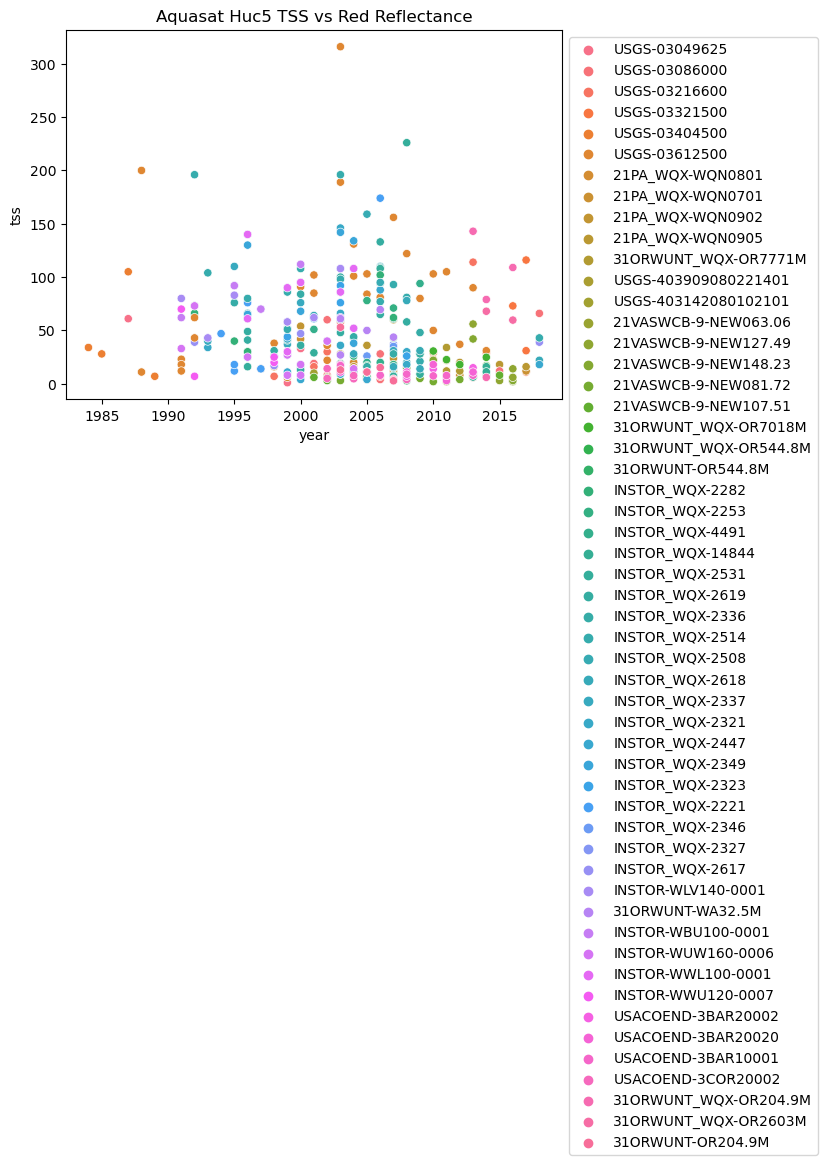

In [31]:
aquaHuc5 = aquaHuc5.drop_duplicates(subset=['SiteID', 'date', 'tss'])
print(len(aquaHuc5.index))
#aquaHuc5.columns = aquaHuc5.columns.str.replace("[.]", "_")
#aquaHuc5.to_csv(r'aquasat_huc5_ratio.csv')

aquaHuc5['Matchup'] = 'Aquasat'
aquaHuc5['sceneID'] = aquaHuc5['landsat_id']
aquaHuc5['tss_log'] = np.log(aquaHuc5['tss'])
aquaHuc5['R_GB_log'] = np.log(aquaHuc5['R_GB'])

aquaHuc5['year'] = pd.to_datetime(aquaHuc5['date']).dt.year
aquaHuc5['month'] = pd.to_datetime(aquaHuc5['date']).dt.month
#aquaHuc5 = aquaHuc5[aquaHuc5['date_utc'] > '2000-01-01T00:00:00Z']
#aquaHuc5 = aquaHuc5.groupby("SiteID")#.filter(lambda x: len(x) > 5)
#print(aquaHuc5.SiteID.values.tolist())


plot = sns.scatterplot(data=aquaHuc5, x="year", y="tss", 
                       legend = 'brief', hue="SiteID")
plt.legend(fontsize='6')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set(title='Aquasat Huc5 TSS vs Red Reflectance')

In [42]:
#For CSV
aquaFhuc5_csv = pd.concat([aquaHuc5, finePred_tss],  axis=0).drop_duplicates(subset=['SiteID', 'date', 'tss'])
aquaFhuc5_csv.columns.values.tolist()
print(len(aquaFhuc5_csv.index))
aquaFhuc5['date'] = pd.to_datetime(aquaFhuc5.date).dt.date
print(aquaFhuc5.date)
#aquaFhuc5_csv.to_csv(r'aquasatHLS_huc5_ratio.csv')

495
57        1999-07-26
58        1998-10-19
59        2004-06-21
60        1987-09-03
61        2004-06-21
             ...    
102551    2021-01-12
102722    2021-02-24
102754    2021-03-03
102755    2021-03-03
103096    2021-08-09
Name: date, Length: 438, dtype: object


In [26]:
#For model
aquaHuc5 = aquaHuc5[aquaHuc5['units'] == 'mg/l']
finePred_tss = finePred_tss[finePred_tss['units'] == 'mg/l']
aquaHuc5_model = aquaHuc5[['parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'date', 'hydroCondition', 'hydroEvent', 'blue', 'blue_sd', 'sceneID', 'green', 'green_sd', 'nir', 'nir_sd', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'tss', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'tss_log', 'R_GB_log', 'year', 'month']]
finePred_tss_model = finePred_tss[['tss', 'parameter', 'units', 'SiteID', 'datum', 'hydroCondition', 'hydroEvent', 'date', 'sceneID', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'R_GB_log', 'tss_log', 'year', 'month']]
aquaFhuc5 = pd.concat([aquaHuc5_model, finePred_tss_model])



Text(0.5, 0, 'Band (Red/(Green + Blue))')

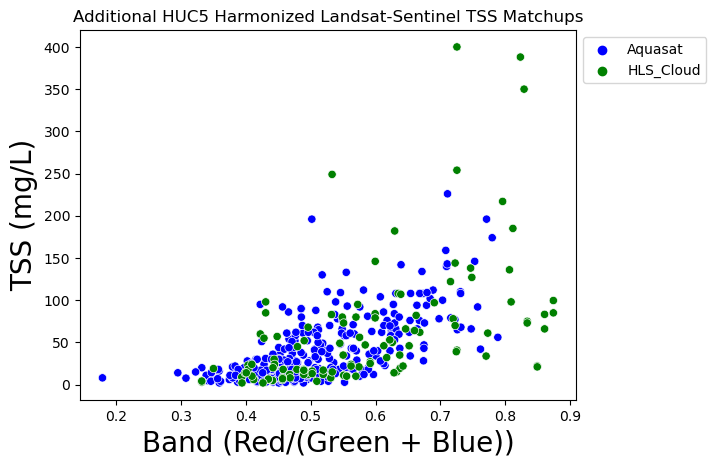

In [27]:
plot = sns.scatterplot(data=aquaFhuc5, x="R_GB", y="tss", 
                       legend = 'brief', hue = 'Matchup', palette = ['blue',  'green'])
plot.legend(fontsize='20')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set(title='Additional HUC5 Harmonized Landsat-Sentinel TSS Matchups')
plt.ylabel('TSS (mg/L)', fontsize='20')
plt.xlabel('Band (Red/(Green + Blue))', fontsize='20')

# Model

In [15]:
import numpy as np
import pandas as pd
from numpy import mean, arange
from numpy import std
import pprint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn import ensemble, datasets, tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [16]:
#Clean data
df = aquaFhuc5.groupby('SiteID').filter(lambda x: len(x) > 5)
print(df.columns.values.tolist())
df = df.dropna(subset=['tss'])


df = df[(df.red > 0) & (df.nir > 0) & (df.blue > 0) & (df.green > 0) & (df.swir1 > 0) & (df.swir2 > 0) & (df.tss < 200)]


print(df.blue.describe())


['parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'date', 'hydroCondition', 'hydroEvent', 'blue', 'blue_sd', 'sceneID', 'green', 'green_sd', 'nir', 'nir_sd', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'tss', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'tss_log', 'R_GB_log', 'year', 'month']
count     380.000000
mean      522.780474
std       298.976227
min        88.000000
25%       368.500000
50%       469.166667
75%       601.750000
max      2962.000000
Name: blue, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(304, 8)
(76, 8)
(304,)
(76,)


[Text(0.5, 1.0, 'Sites with >5 Measurement tss - R_GB Reflectance')]

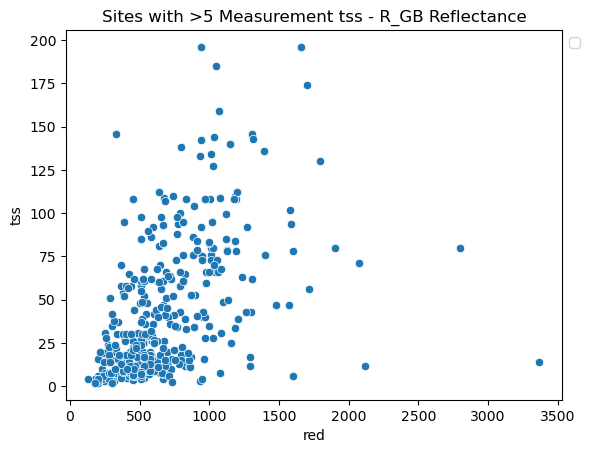

In [17]:
#define a training and testing set


df= df[['red', 'blue', 'green', 'nir', 'swir1', 'swir2', 'year', 'month', 'tss']] #'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndssi']].dropna(axis=0) #dropping na just in case here again

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'tss']
y = df.loc[:, 'tss'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

#Generate Plot
plot = sns.scatterplot(data=df, x="red", y="tss", 
                       legend = 'brief')
plt.legend(fontsize='6')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set(title='Sites with >5 Measurement tss - R_GB Reflectance')

# Random Forest 1: No fit

Target: TSS

Input Data: 6 Bands and their ratios

In [18]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', model.oob_score_)

prediction = model.predict(X_test)

#Metrics for Model 1 

RMSE_model = np.sqrt(mean_squared_error(y_test, prediction))

#Metrics
print('Training score', model.score(X_train, y_train))
print('RMSE', RMSE_model)
print('Testing score', model.score(X_test, y_test))

Trained model oob score 0.3994473580363974
Training score 0.9108768805372939
RMSE 29.45474812541108
Testing score 0.5194010611269225


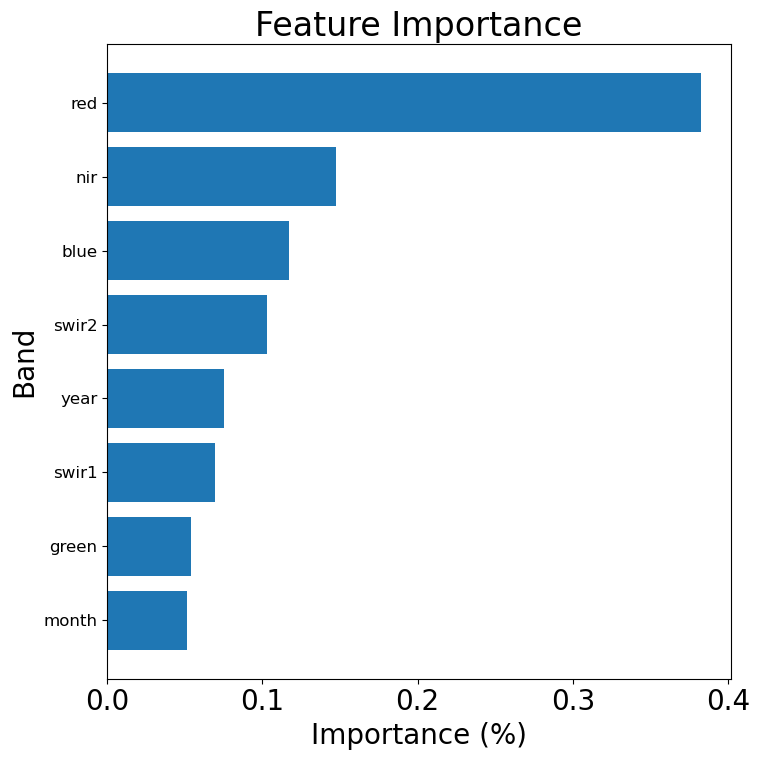

In [19]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(X.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

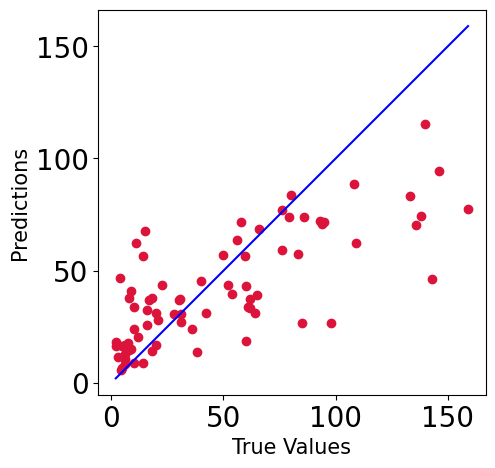

In [20]:
plt.figure(figsize=(5,5))

import math
# y_test = math.e ** y_test
# prediction = math.e ** prediction

plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

21.130214578111946


<AxesSubplot:>

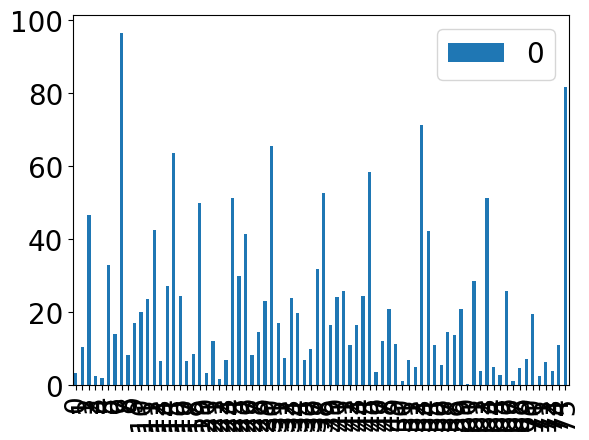

In [21]:
# Calculate the absolute errors
errors = abs(prediction - y_test)
print(mean(errors))
pd.DataFrame(errors).plot(kind='bar')

In [22]:
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])

from sklearn.metrics import r2_score
RSquared = r2_score(y_train, X_train_predict.reset_index().values)
print('RSquared', RSquared)

RSquared 0.9108768805372939


# Optimizing the Random Forest

## I will optimize:

max_features

n_estimators

max_depth


In [23]:
###takes a lot of time. See results below.

from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
param_grid = {
            "n_estimators" : [100, 150, 200, 300],
            "max_features" : ["1.0", "log2", "sqrt"],
            "max_depth"    : [1, 4, 7, 8, 10]
        }


grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
grid.fit(X_train, y_train)


forest = grid.best_estimator_

grid_prediction=forest.predict(X_test)

print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

mae_grid = mean_absolute_error(y_test, grid_prediction)
RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

print('MAE:', mae_grid)
print('RMSE:', RMSE_model_grid)

/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/si

Grid best score: 0.3863919690363738 Grid best params: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
MAE: 21.85239185754425
RMSE: 30.565680852871274


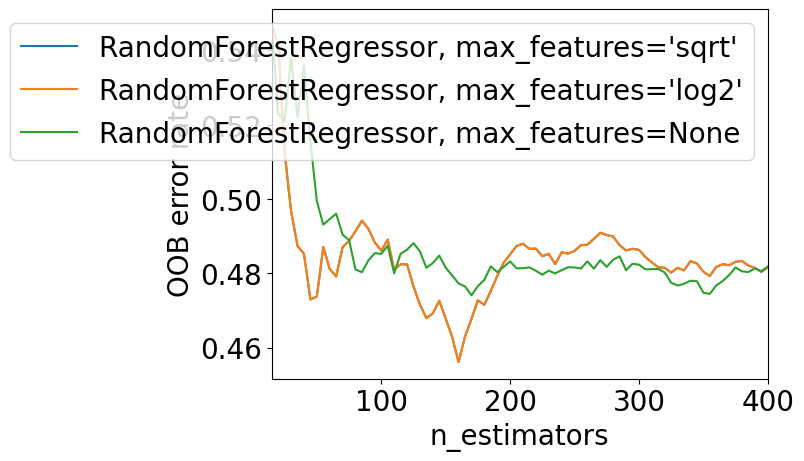

In [24]:
#Optimize RF
#OPtimize max_features and n_estimators using oob_score


#plot ensemble oob

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

RANDOM_STATE = 42

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(
            bootstrap=True,
            warm_start=True,
            oob_score=True,
            verbose =0,
            max_features=3,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(
            bootstrap=True,
            warm_start=True,
            max_features="log2",
            oob_score=True,
            verbose =0,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestRegressor, max_features=None",
        RandomForestRegressor(
            bootstrap=True,
            warm_start=True,
            max_features=None,
            oob_score=True,
            verbose = 0,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 400

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_test, y_test)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Processed Regression Tree (depth=1)
Processed Regression Tree (depth=2)
Processed Regression Tree (depth=3)
Processed Regression Tree (depth=4)
Processed Regression Tree (depth=5)
Processed Regression Tree (depth=6)
Processed Regression Tree (depth=7)
Processed Regression Tree (depth=8)
Processed Regression Tree (depth=9)
Processed Regression Tree (depth=10)
Processed Regression Tree (depth=11)
Processed Regression Tree (depth=12)
Processed Regression Tree (depth=13)
Processed Regression Tree (depth=14)
Processed Regression Tree (depth=15)


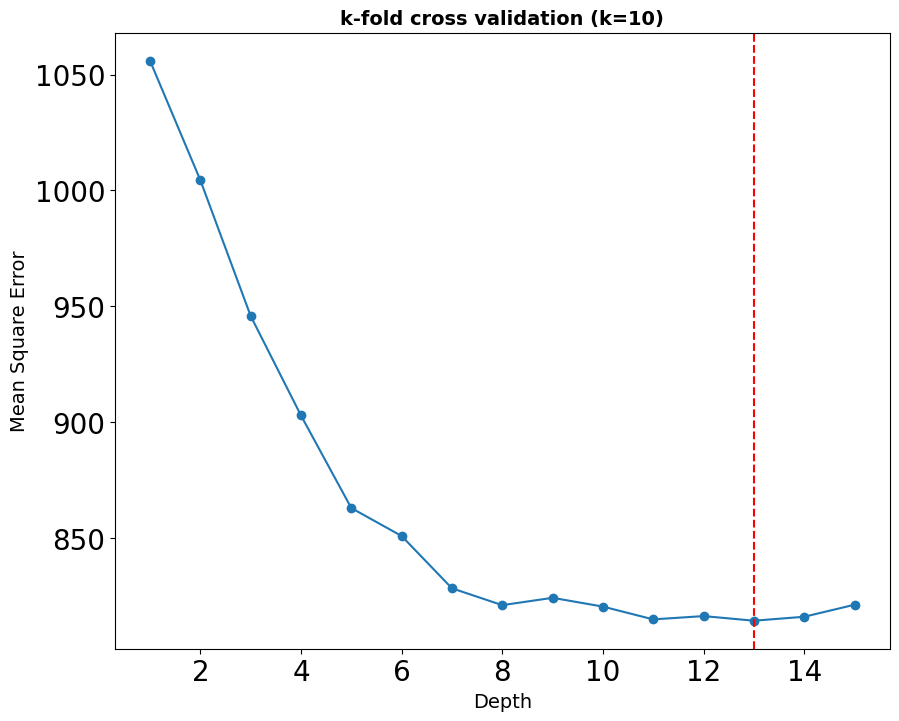

In [25]:
# Setup evaluation with 10-fold cv
k_fold = 10
dep = np.arange(1,15+1)

scores = []
for i in dep:
    cv = cross_val_score(RandomForestRegressor(random_state=42,max_depth=i), X_train, y_train,\
         cv=k_fold, scoring='neg_mean_squared_error').mean()
    scores.append(cv)
    print(f'Processed Regression Tree (depth={i})')
best = dep[np.argmin(np.array(scores)*-1)]

plt.figure(figsize=(10,8))
plt.plot(dep, np.array(scores)*-1, '-o')
plt.axvline(best, color = 'r', ls="--")
plt.xlabel('Depth',fontsize=14)
plt.ylabel('Mean Square Error',fontsize=14)
plt.title(f'k-fold cross validation (k={k_fold})',fontsize=14, fontweight='bold')
plt.show()

# Tuned Model

In [26]:
#define model
model1 = RandomForestRegressor(max_depth = 12, n_estimators = 100, max_features = 3, bootstrap = True, oob_score= True, warm_start = True, ccp_alpha = 0, min_impurity_decrease = 0)

#Quick eval raw
model1.fit(X_train, y_train)
print('Trained model oob score', 1 - model1.oob_score_)

prediction1 = model1.predict(X_test)

print('Test Score', model1.score(X_test, y_test))

#Test Error: Model 1 RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#TEST

RMSE_model1 = np.sqrt(mean_squared_error(y_test, prediction1))

#Metrics
print('Training score', model1.score(X_train, y_train))
print('RMSE', RMSE_model1)
print('Testing score', model1.score(X_test, y_test))



Trained model oob score 0.6053573627778678
Test Score 0.49394971649899355
Training score 0.9092204354210448
RMSE 30.224612790310044
Testing score 0.49394971649899355


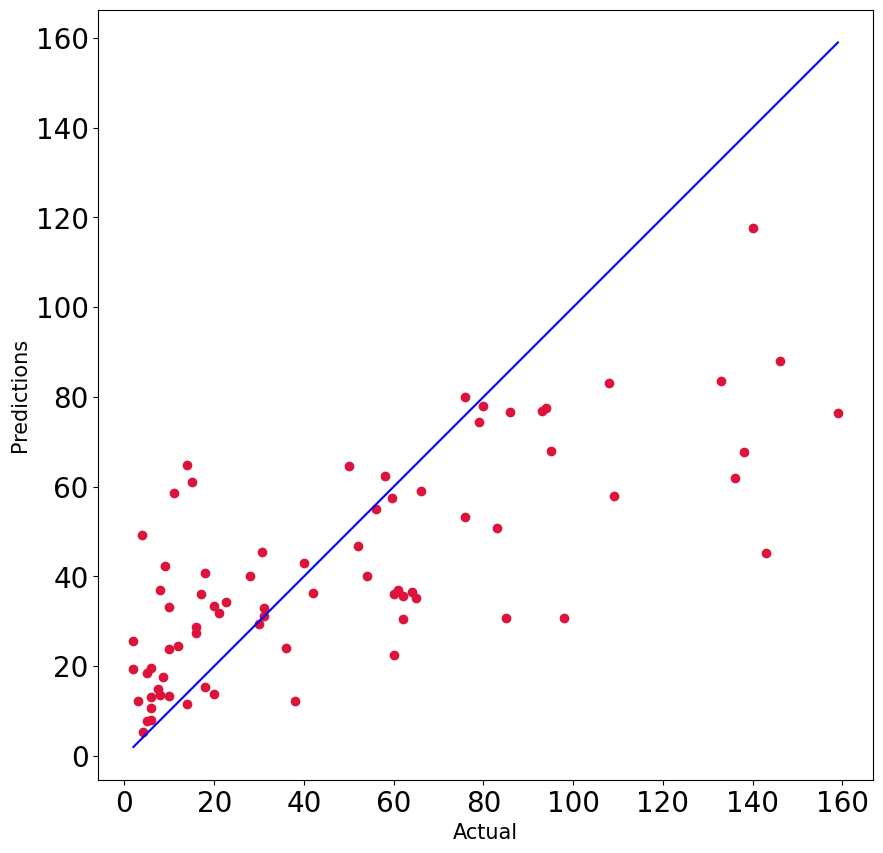

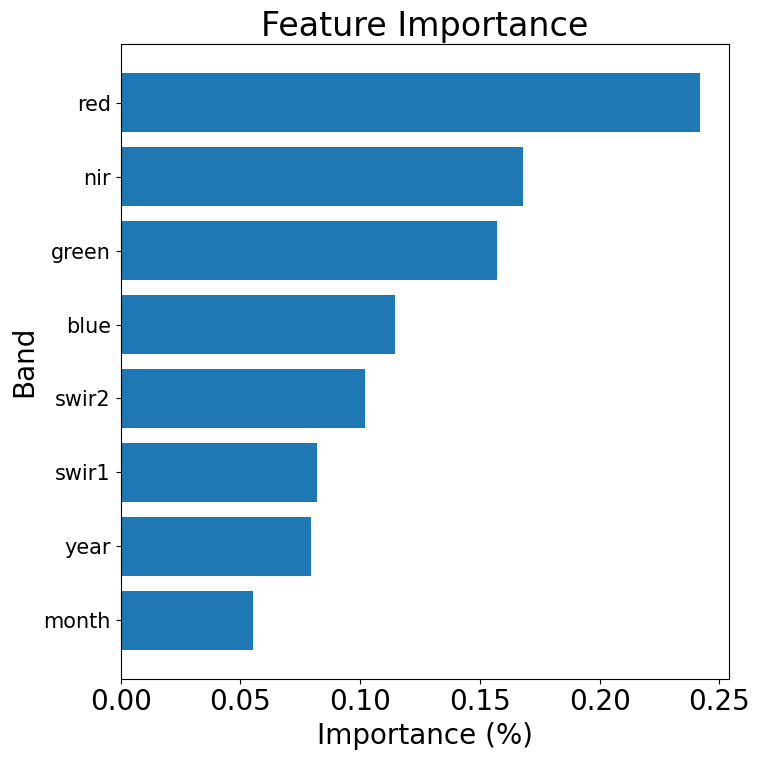

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(X.columns)[sorted_idx], size = 15)
plt.title('Feature Importance')
result = permutation_importance(model1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


           Metric    RF1    RF2
0             MAE   7.29   7.47
1            RMSE  11.26  11.36
2       r_squared    NaN    NaN
3  Training_Score    NaN    NaN
4   Testing_Score    NaN    NaN


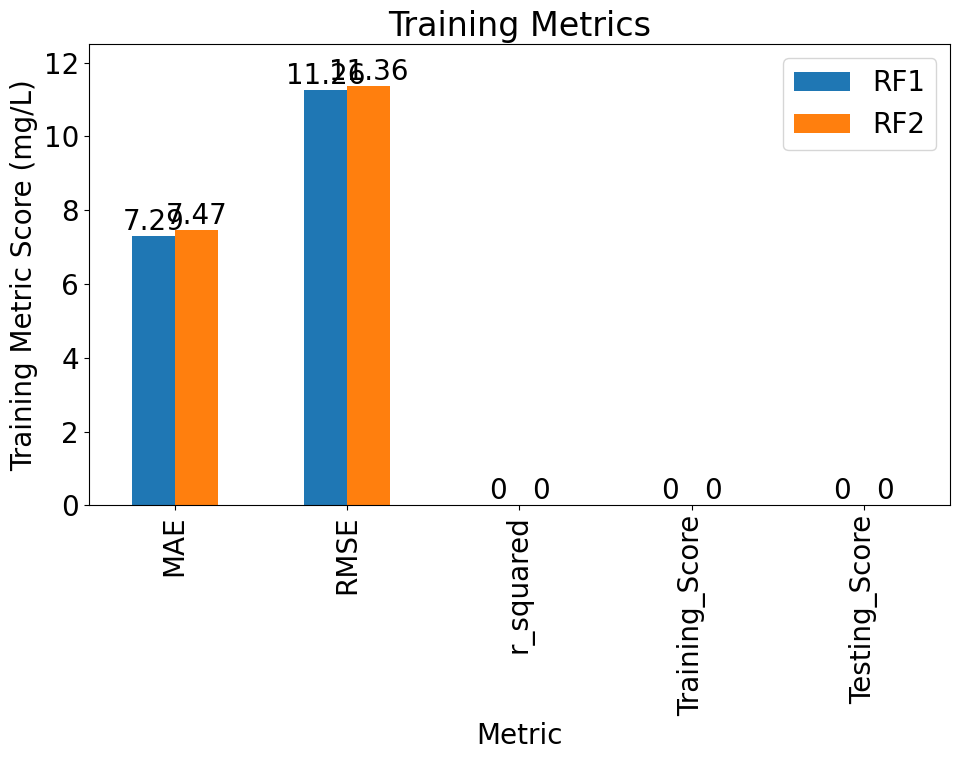

           Metric    RF1    RF2
0             MAE  21.13  21.66
1            RMSE  29.45  30.22
2       r_squared    NaN    NaN
3  Training_Score    NaN    NaN
4   Testing_Score    NaN    NaN


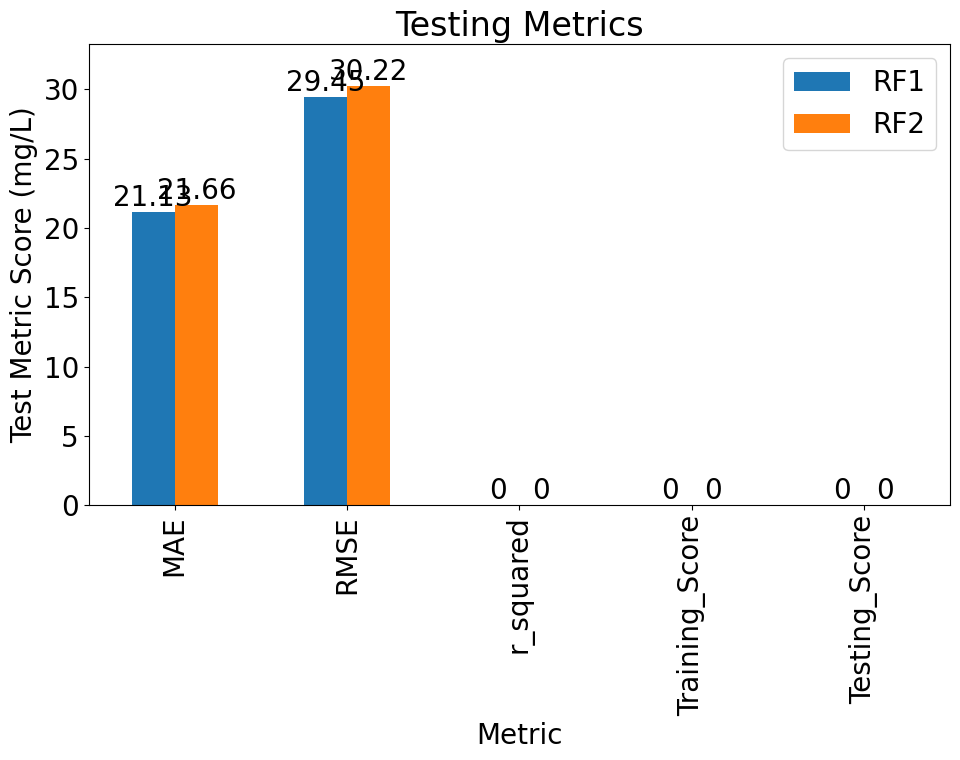

In [28]:
#Collect the test set predictions for d-h models

model_pred = model.predict(X_test)
model1_pred = model1.predict(X_test)


# Keep predictions of models d-h
model_train_pred = [model.predict(X_train),model1.predict(X_train)]

model_test_pred = [model.predict(X_test),model1.predict(X_test)]

# predicted MAE and MSE for training data

models_MAE = []
for i in model_train_pred:
    MAE = np.round(mean_absolute_error(y_train, i),2)
    models_MAE.append(MAE)

models_RMSE = []
for i in model_train_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_train, i)),2)
    models_RMSE.append(RMSE)

    
# Plot
mod_names=['RF1', 'RF2']
metric=pd.DataFrame(['MAE','RMSE', 'r_squared', 'Training_Score', 'Testing_Score'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame([models_MAE,models_RMSE],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Training Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Training Metric Score (mg/L)')
plt.tight_layout()
plt.show()

#Predict MAE and RMSE for test data

models_MAE_test = []
for i in model_test_pred:
    MAE = np.round(mean_absolute_error(y_test, i),2)
    models_MAE_test.append(MAE)

models_RMSE_test = []
for i in model_test_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, i)),2)
    models_RMSE_test.append(RMSE)

# Plot
df = pd.concat([metric,pd.DataFrame([models_MAE_test,models_RMSE_test],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Testing Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Test Metric Score (mg/L)')
plt.tight_layout()
plt.show()